# Introdução a quantum computing

Nessa primeira seção, importamos tudo que é necessário para os nossos testes e definimos uma classe `Circuit` que deixa, um pouco, mais simples a visualização dos estados do circuito quântico  

In [70]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile, QuantumRegister, AncillaRegister
from qiskit.circuit import CircuitError
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

In [58]:
class Circuit(QuantumCircuit):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.shots = 1000
        self.backend = AerSimulator()
        self.last_result = None

    def draw(self):
        display(circuit_drawer(self, output='mpl'))
        return self
    
    def bloch(self):
        display(Statevector(self).draw('bloch'))
        return self

    def state(self):
        display(Statevector(self).draw('latex'))
        return self

    def execute(self, measure_qubits=None):
        transpiled_circuit = transpile(self, self.backend)
        
        if(not measure_qubits): transpiled_circuit.measure_all()
        else: 
            cregs_size = transpiled_circuit.cregs[0].size
            transpiled_circuit.measure(measure_qubits, list(range(cregs_size)))

        self.last_result = self.backend.run(transpiled_circuit, shots=self.shots).result().get_counts()
        return self
    
    def get_results(self):
        return self.last_result
    
    def histogram(self):
        if(not self.last_result): raise CircuitError("No measurements!")

        display(plot_histogram(self.last_result))
        return self
    
    def __repr__(self):
        return ""
        
        

---
# Superposição

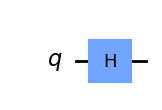

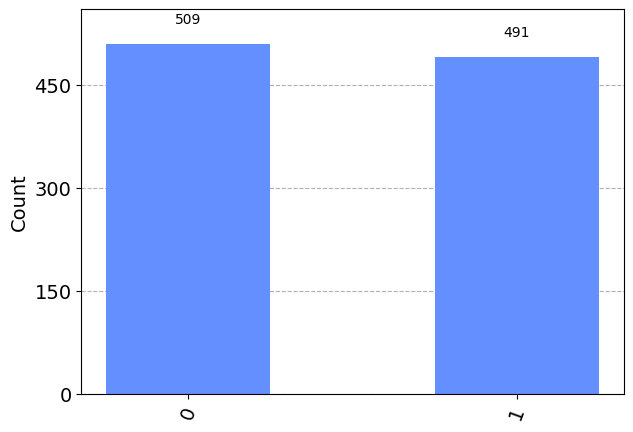

In [59]:
circuit = Circuit(1)
circuit.h(0)
circuit.draw().execute().histogram()

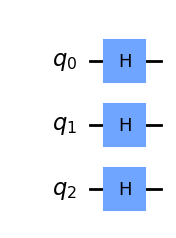

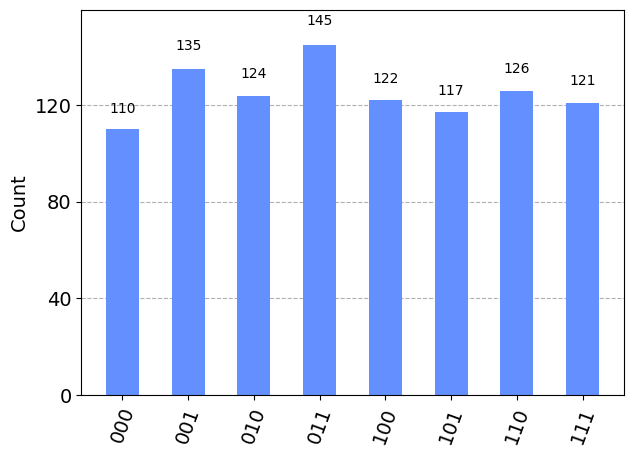

In [24]:
circuit = Circuit(3)
circuit.h(range(3))
circuit.draw().execute().histogram()

---

# Entanglment

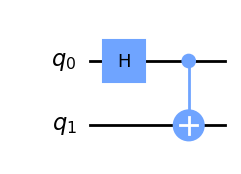

<IPython.core.display.Latex object>

In [13]:
circuit = Circuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw().state()

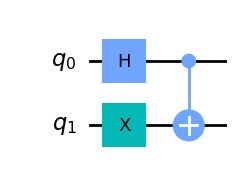

<IPython.core.display.Latex object>

In [11]:
circuit = Circuit(2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.draw().state()

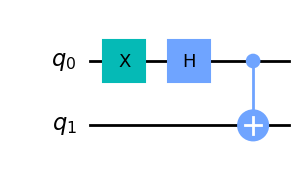

<IPython.core.display.Latex object>

In [10]:
circuit = Circuit(2)
circuit.x(0)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw().state()

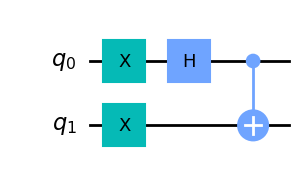

<IPython.core.display.Latex object>

In [14]:
circuit = Circuit(2)
circuit.x(range(2))
circuit.h(0)
circuit.cx(0, 1)
circuit.draw().state()

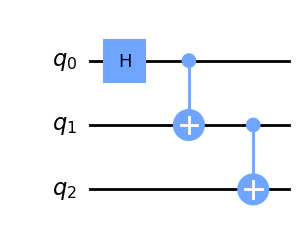

<IPython.core.display.Latex object>

In [17]:
# GHZ state
circuit = Circuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.draw().state()

---
# Interferência

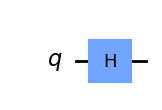

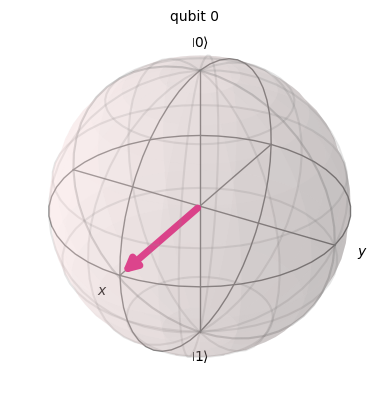

In [9]:
circuit = Circuit(1)
circuit.h(0)
circuit.draw().bloch()

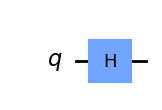

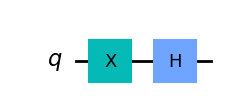

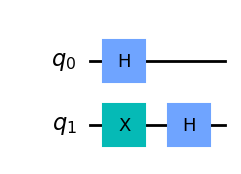

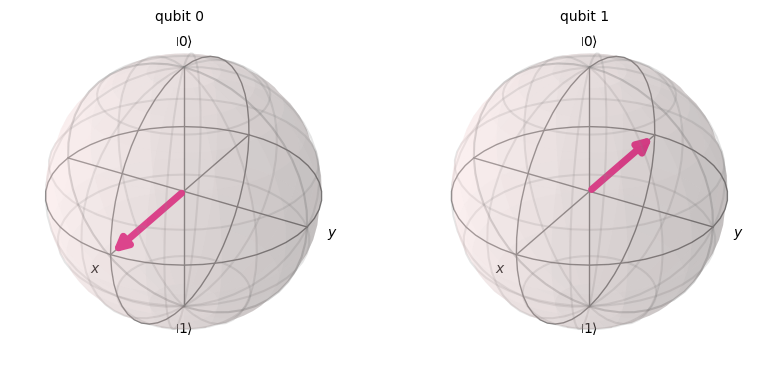

In [17]:
first_amplitude = Circuit(1)
first_amplitude.h(0)
first_amplitude.draw()

second_amplitude = Circuit(1)
second_amplitude.x(0)
second_amplitude.h(0)
second_amplitude.draw()

final = Circuit(2)
final.compose(first_amplitude, 0, inplace=True)
final.compose(second_amplitude, 1, inplace=True)
final.draw().bloch()

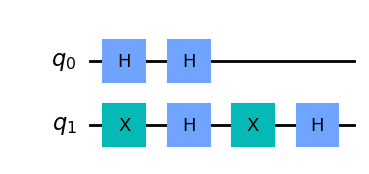

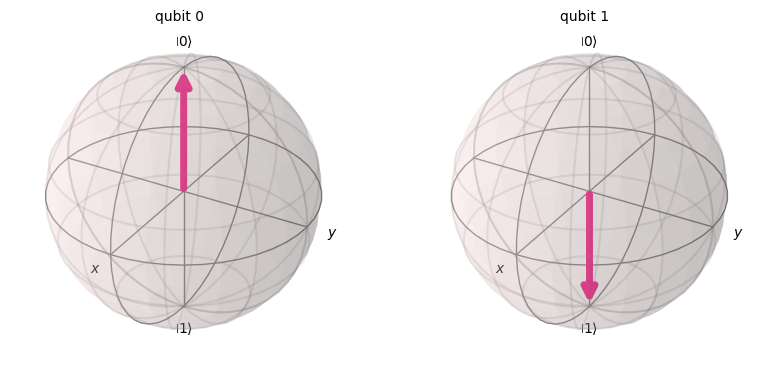

In [21]:
no_interference = final.copy()
no_interference.compose(first_amplitude, 0, inplace=True)
no_interference.compose(second_amplitude, 1, inplace=True)
no_interference.draw().bloch()

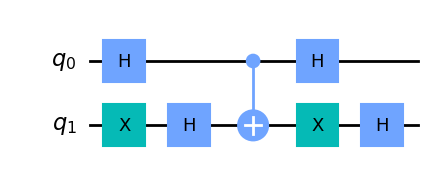

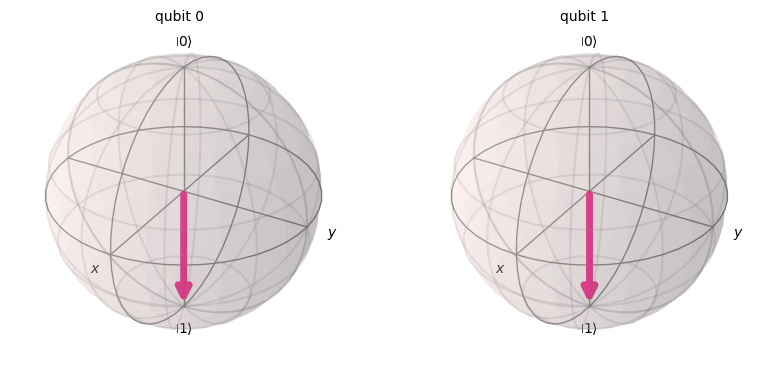

In [22]:
interference = final.copy()
interference.cx(0, 1)
interference.compose(first_amplitude, 0, inplace=True)
interference.compose(second_amplitude, 1, inplace=True)
interference.draw().bloch()

---

# Grover's Algorithm

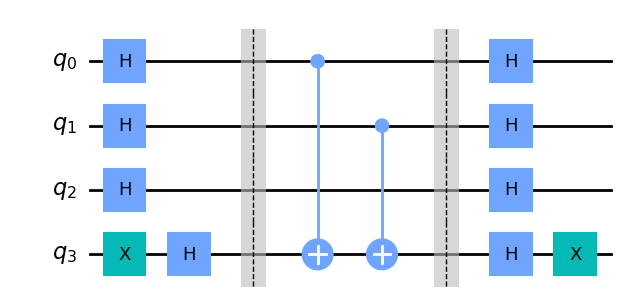

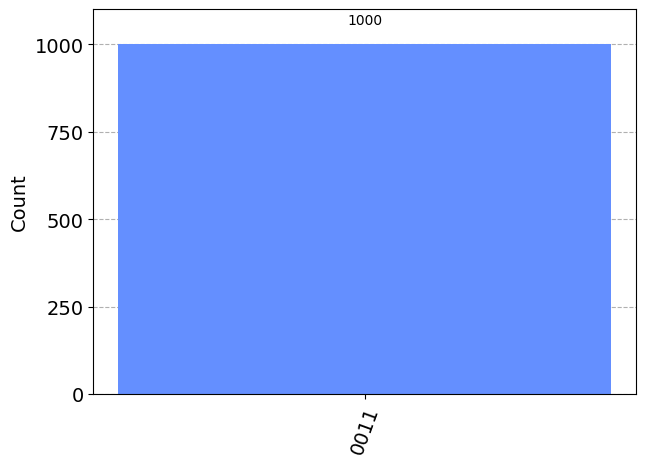

In [85]:
oracle = Circuit(4, name="oracle")

oracle.x(-1)
oracle.h(range(4))
oracle.barrier()
oracle.cx(0, -1)
oracle.cx(1, -1)
oracle.barrier()
oracle.h(range(4))
oracle.x(-1)

oracle.draw().execute().histogram()


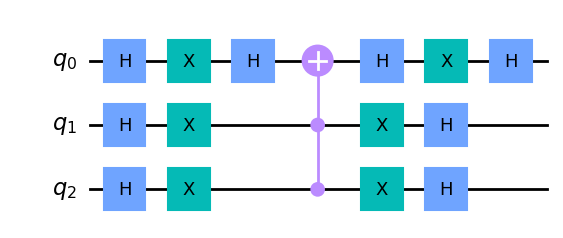

In [66]:
diffuser = Circuit(3, name="diffuser")
diffuser.h(range(3))
diffuser.x(range(3))
diffuser.h(0)

diffuser.mct(list(range(1, 3)), 0)

diffuser.h(0)
diffuser.x(range(3))
diffuser.h(range(3))

diffuser.draw()

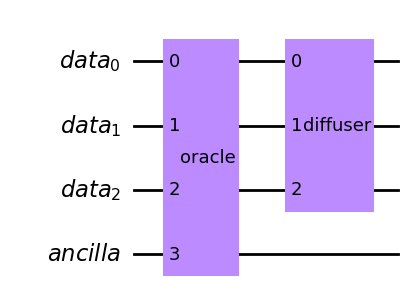

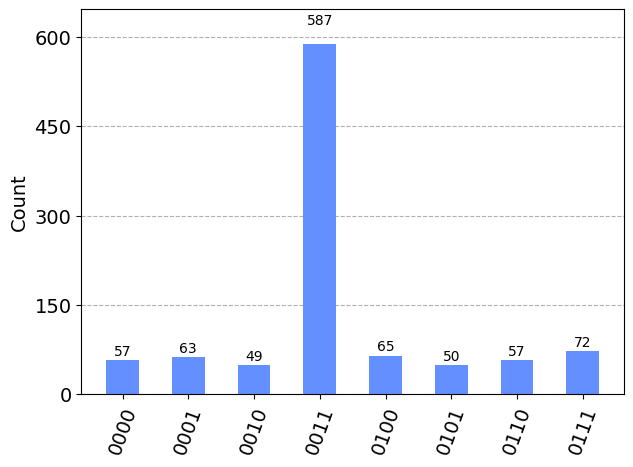

In [96]:
data_qubits = QuantumRegister(3, name="data")
ancilla = AncillaRegister(1, name="ancilla")
grover = Circuit(data_qubits, ancilla)

grover.append(oracle, [*data_qubits, ancilla])
grover.append(diffuser, [*data_qubits])

grover.draw().execute().histogram()